# User Agent의 사용 방법

**header를 입력하지 않은 경우**

In [1]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://danawa.com/')
soup = BeautifulSoup(res.content, 'html.parser')

In [4]:
soup
# This page can't be displayed. Contact support for additional information.
# -> 막힘

<html><header><title>Error</title></header><body><h2>Error</h2><table bgcolor="#FEEE7A" border="0" cellpadding="0" cellspacing="0" width="400"><tr><td><table border="0" cellpadding="3" cellspacing="1"><tr align="Left" bgcolor="#FBFFDF" valign="top"><td><strong>Error</strong></td></tr><tr bgcolor="#FFFFFF" valign="top"><td>This page can't be displayed. Contact support for additional information.<br/>The incident ID is: 6904357340396584485.</td></tr></table></td></tr></table></body></html>

**header를 입력한 경우**

In [6]:
import requests
from bs4 import BeautifulSoup

#header 입력
# 내용을 불러올 수 있음 뚫림!!
headers = {
	"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"
}

res = requests.get('https://danawa.com/', headers = headers)
soup = BeautifulSoup(res.content, 'html.parser')

In [7]:
soup

<!DOCTYPE html>
<html lang="ko" xml:lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>스마트한 쇼핑검색, 다나와! : 가격비교 사이트</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="스마트한 쇼핑검색, 다나와! : 가격비교 사이트" name="Title"/><meta content="가격비교 사이트 - 온라인 쇼핑몰, 소셜커머스 전 상품 정보 가격비교 사이트, 비교하면 다나와" name="Description"/><meta content="가격비교, 상품 추천, 가격비교사이트, 다나와, 가격비교 사이트, 가격비교 싸이트, 가격 검색, 최저가, 추천, 인터넷쇼핑, 온라인쇼핑, 쇼핑, 쇼핑몰, 싸게 파는 곳, 지식쇼핑" name="Keywords"/><meta content="스마트한 쇼핑검색, 다나와! : 가격비교 사이트" name="Subject"/>
<meta content="http://www.danawa.com" name="author"/>
<meta content="index, follow" name="robots"/>
<meta content="스마트한 쇼핑검색, 다나와! : 가격비교 사이트" property="og:title">
<meta content="http://www.danawa.com" property="og:url">
<meta content="website" property="og:type">
<meta content="가격비교 사이트 - 온라인 쇼핑몰, 소셜커머스 전 상품 정보 가격비교 사이트, 비교하면 다나와" property="og:description"/>
<meta content="스마트한 쇼핑검색, 다나와! : 가격비교 사이트" p

# BeautifulSoup을 이용한 정적 웹페이지 크롤링
## GMarket은 다 허용

In [8]:
from bs4 import BeautifulSoup
import requests
import re

#1. 링크를 request.get으로 가져오기 (header가 필요한 경우 headers 입력)
# python과 url이 소통
res = requests.get("https://www.gmarket.co.kr/n/best")

#2. BeautifulSoup을 이용해 파싱하기
soup = BeautifulSoup(res.content, 'html.parser')

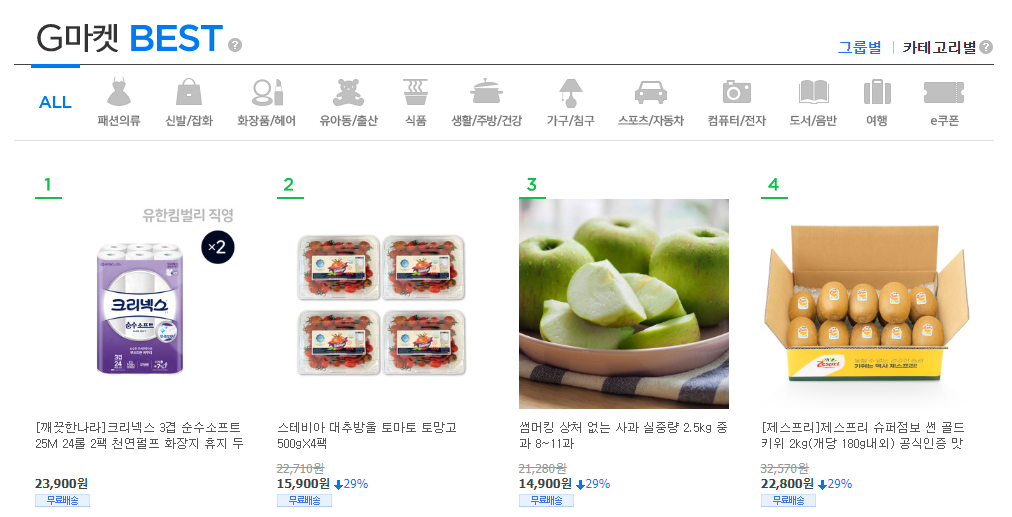

In [14]:
soup

<!DOCTYPE html>
<html class="no-js" lang="ko"><head><meta content="width=980" name="viewport"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="X-UA-Compatible"/><meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/><meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/><meta content="https://www.gmarket.co.kr/n/best" name="msapplication-starturl"/><meta content="Gmarket" property="og:site_name"/><meta content="G마켓 베스트" property="og:title"/><meta content="website" property="og:type"/><meta content="https://www.gmarket.co.kr/n/best" property="og:url"/><meta content="http://pics.gmarket.co.kr/mobile/single/kr/common/sns/gmarket_sns.png" property="og:image"/><link href="https://www.gmarket.

## 상품명 크롤링

select_one 함수는 주어진 것과 매칭되는 데이터 하나만 추출

In [15]:
#gBestWrap > div.best-list > ul > li:nth-child(1) > a

In [16]:
soup.select_one('#gBestWrap > div.best-list > ul > li:nth-child(1) > a')

<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2945646109&amp;ver=20230721">[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스)</a>

In [17]:
soup.select_one('#gBestWrap > div.best-list > ul > li:nth-child(2) > a')

<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2209695067&amp;ver=20230721">[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가)</a>

select 함수는 주어진 것과 매칭되는 데이터 모두 추출해 **리스트 형태**로 반환

In [18]:
soup.select('a.itemname')

[<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2945646109&amp;ver=20230721">[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스)</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2209695067&amp;ver=20230721">[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가)</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2771978480&amp;ver=20230721">[청정원]청정원 소시지랑 떡이랑 440g(4입) x 2봉(총 8개입) 소떡소떡</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2665795649&amp;ver=20230721">[농협안심한우]쿠폰23440원) 1등급 농협 안심 한우 국거리 덩어리 or 불고기 500g+500g 냉장 암소 / 2세트 주문시 무료배송</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3067741176&amp;ver=20230721">(특가) 소마셈 팩토 세트 선택구매</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3057826152&amp;ver=20230721">[이마트24](클럽전용) 이마트24 1만원 금액권</a>,
 <a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=3052129108&amp;ver=20230721">[언더아머](신세계의정부점)언더아머 헤비웨이트 남녀공용 루즈핏 면티 면 반팔티 반팔티

In [19]:
print(type(soup.select('a.itemname')))
print(len(soup.select('a.itemname')))

print(soup.select('a.itemname')[0])
print(soup.select('a.itemname')[-1])

<class 'bs4.element.ResultSet'>
200
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2945646109&amp;ver=20230721">[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스)</a>
<a class="itemname" href="http://item.gmarket.co.kr/Item?goodscode=2629720841&amp;ver=20230721">[TS티마]여름마스크 100매 TS 레모나 위가드 스카이슘 새부리형 중형 대형 KF94 쿨마스크 모음전</a>


In [20]:
#item_list 변수에 저장
item_list = soup.select('a.itemname')

get_text()는 각 객체에 대해 text만 가져와줌
객체에 대해서만!!

In [22]:
item_list[-1].get_text()

'[TS티마]여름마스크 100매 TS 레모나 위가드 스카이슘 새부리형 중형 대형 KF94 쿨마스크 모음전'

In [23]:
#item_list의 모든 객체에 대해 get_text()를 하고 또 다른 리스트에 저장

title_list = list()

for item in item_list:
  title_list.append(item.get_text())

In [24]:
title_list

['[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스)',
 '[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가)',
 '[청정원]청정원 소시지랑 떡이랑 440g(4입) x 2봉(총 8개입) 소떡소떡',
 '[농협안심한우]쿠폰23440원) 1등급 농협 안심 한우 국거리 덩어리 or 불고기 500g+500g 냉장 암소 / 2세트 주문시 무료배송',
 '(특가) 소마셈 팩토 세트 선택구매',
 '[이마트24](클럽전용) 이마트24 1만원 금액권',
 '[언더아머](신세계의정부점)언더아머 헤비웨이트 남녀공용 루즈핏 면티 면 반팔티 반팔티셔츠',
 '[아이더](신세계강남점)[23s/s]아이더 POP ON 2 PACK-S 남성 반팔 티셔츠 / DMM23294',
 'JEEP(지프) 등산모자 CA 0352 남성.여성공용 벙거지 낚시  버킷햇 남자 여자 여름',
 '새콤달콤 경북 아오리 사과 2kg 9-11과 (중과)',
 '[피코크]피코크 떡갈비 450gx6팩 (신세계푸드 중복 쿠폰 할인)',
 '[메가박스](유니버스클럽 전용) 메가박스 일반예매권 2D-주중/주말',
 '[길벗스쿨]길벗이지톡_영어회화 핵심패턴233 2권세트 (7월31일 예약발송)',
 '[롯데칠성]칠성사이다 210ml x 30캔/탄산음료/사이다/음료수',
 '[어나더디](15%쿠폰가 11820원)(1+1) 더 아이 주니어 하이틴 심리스 브라탑 일체형 노와이어',
 '[롯데칠성]칠성사이다 제로 210ml캔30입',
 '[롯데칠성]레쓰비 마일드 캔커피 160ml x 60캔 /커피음료/업소용음료/업소용커피',
 '[롯데칠성]레쓰비 마일드 캔커피 175ml x 60캔',
 '[롯데칠성]펩시콜라 제로 210ml x 30캔',
 '[구글플레이]기프트코드 10만원 / 구글 기프트카드',
 '[롯데칠성]밀키스 제로 250ml 30캔',
 '놀러가G/할인가51만원대~ | 인천出 사이판 PIC 골드vs켄싱턴 올인클루시브 4~6일 (객실UP+호텔식사포함)',
 'Jeep 남자.여자공용 볼캡 야

## 가격 정보 크롤링

정가 정보 크롤링

In [25]:
item_list = soup.select('div.o-price')

In [26]:
#item_list의 모든 객체에 대해 get_text()를 하고 또 다른 리스트에 저장

original_price_list = list()

for item in item_list:
  original_price_list.append(item.get_text())

세일을 하고 있지 않다면 ''로 되어있음

In [27]:
original_price_list

['',
 '정가32,800원',
 '',
 '',
 '정가53,200원',
 '',
 '정가34,300원',
 '정가30,000원',
 '정가60,000원',
 '정가18,430원',
 '정가52,200원',
 '',
 '정가46,800원',
 '',
 '정가46,330원',
 '',
 '',
 '',
 '',
 '정가100,000원',
 '',
 '정가629,000원',
 '정가42,000원',
 '',
 '정가56,000원',
 '정가55,000원',
 '정가25,800원',
 '정가24,900원',
 '',
 '',
 '정가21,800원',
 '',
 '정가20,000원',
 '정가42,900원',
 '정가15,000원',
 '정가68,600원',
 '',
 '정가20,860원',
 '',
 '정가50,000원',
 '정가30,000원',
 '',
 '정가31,000원',
 '',
 '정가33,000원',
 '',
 '',
 '',
 '정가35,000원',
 '정가50,000원',
 '정가10,700원',
 '정가62,400원',
 '정가51,900원',
 '',
 '정가39,600원',
 '정가35,570원',
 '정가35,600원',
 '정가59,000원',
 '정가42,710원',
 '정가21,300원',
 '',
 '정가35,000원',
 '정가55,570원',
 '',
 '정가35,700원',
 '정가42,300원',
 '',
 '정가22,800원',
 '',
 '정가79,900원',
 '정가32,570원',
 '',
 '정가65,000원',
 '정가109,000원',
 '정가10,000원',
 '정가31,900원',
 '정가48,000원',
 '정가55,000원',
 '정가30,000원',
 '정가22,900원',
 '',
 '',
 '정가30,000원',
 '정가39,900원',
 '정가48,000원',
 '정가33,000원',
 '정가50,900원',
 '',
 '정가19,900원',
 '정가17,200원',
 '정가90,000원',
 '

할인가 정보 크롤링

In [28]:
item_list = soup.select('div.s-price')

In [29]:
#item_list의 모든 객체에 대해 get_text()를 하고 또 다른 리스트에 저장

sale_price_list = list()

for item in item_list:
  sale_price_list.append(item.get_text())

In [30]:
sale_price_list

['할인가33,000원 ',
 '할인가22,900원 30%',
 '할인가17,900원 ',
 '할인가27,900원 ',
 '할인가34,580원 35%',
 '할인가10,000원 ',
 '할인가27,440원 20%',
 '할인가25,650원 14%',
 '할인가18,000원 70%',
 '할인가12,900원 30%',
 '할인가33,950원 34%',
 '할인가15,000원 ',
 '할인가36,000원 23%',
 '할인가19,400원 ',
 '할인가13,900원 69%',
 '할인가19,400원 ',
 '할인가26,000원 ',
 '할인가28,800원 ',
 '할인가19,400원 ',
 '할인가95,000원 5%',
 '할인가24,800원 ',
 '할인가609,000원 3%',
 '할인가12,600원 70%',
 '할인가20,900원 ',
 '할인가28,000원 50%',
 '할인가27,500원 50%',
 '할인가12,900원 50%',
 '할인가17,560원 29%',
 '할인가22,300원 ',
 '할인가14,580원 ',
 '할인가10,900원 50%',
 '할인가32,900원 ',
 '할인가13,990원 30%',
 '할인가12,870원 70%',
 '할인가7,500원 50%',
 '할인가49,730원 27%',
 '할인가18,400원 ',
 '할인가14,600원 30%',
 '할인가13,900원 ',
 '할인가47,500원 5%',
 '할인가28,500원 5%',
 '할인가20,000원 ',
 '할인가28,000원 9%',
 '할인가24,000원 ',
 '할인가9,900원 70%',
 '할인가28,500원 ',
 '할인가20,900원 ',
 '할인가15,000원 ',
 '할인가24,500원 30%',
 '할인가15,000원 70%',
 '할인가6,500원 39%',
 '할인가49,900원 20%',
 '할인가46,710원 10%',
 '할인가21,900원 ',
 '할인가11,900원 69%',
 '할인가24,900원 29%',
 '할인가10,700원

##데이터 프레임으로 저장하고 Excel 파일로 저장하기

In [34]:
import pandas as pd
gmarket_df = pd.DataFrame([title_list, original_price_list, sale_price_list])

gmarket_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스),[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가),[청정원]청정원 소시지랑 떡이랑 440g(4입) x 2봉(총 8개입) 소떡소떡,[농협안심한우]쿠폰23440원) 1등급 농협 안심 한우 국거리 덩어리 or 불고기 ...,(특가) 소마셈 팩토 세트 선택구매,[이마트24](클럽전용) 이마트24 1만원 금액권,[언더아머](신세계의정부점)언더아머 헤비웨이트 남녀공용 루즈핏 면티 면 반팔티 반팔티셔츠,[아이더](신세계강남점)[23s/s]아이더 POP ON 2 PACK-S 남성 반팔 ...,JEEP(지프) 등산모자 CA 0352 남성.여성공용 벙거지 낚시 버킷햇 남자 여...,새콤달콤 경북 아오리 사과 2kg 9-11과 (중과),...,[메디안]멀티클리닉 칫솔 미세모 10입 기획세트 3개 (총 30입),(행사상품)송탄농협_밥맛좋은경기추청미_10KG 포,[아이러브베베]아이러브베베아기물티슈 핑크100매캡형X20팩,[구글플레이]기프트코드 15만원 / 구글 기프트카드,[팸퍼스]팸퍼스 2023에어차차 팬티형 5단계 156매 (52X3),씨가 적어 먹기 편한 수박 6kg미만,엿구마 해남 아이스 군고구마 1kg+1kg (kg당 3-8개입) / 쿠폰가 19710,[천재교육]돌잡이 명화(전 17종+디지털앱) - 펜 미포함,[올반키친]올반 볶음밥 3종 10봉(새우4+김치4+우삼겹2)(신세계푸드 중복쿠폰 할인),[TS티마]여름마스크 100매 TS 레모나 위가드 스카이슘 새부리형 중형 대형 KF...
1,,"정가32,800원",,,"정가53,200원",,"정가34,300원","정가30,000원","정가60,000원","정가18,430원",...,"정가20,500원",,"정가27,800원","정가150,000원",,,"정가31,300원","정가120,000원",,"정가33,000원"
2,"할인가33,000원","할인가22,900원 30%","할인가17,900원","할인가27,900원","할인가34,580원 35%","할인가10,000원","할인가27,440원 20%","할인가25,650원 14%","할인가18,000원 70%","할인가12,900원 30%",...,"할인가19,400원 5%","할인가24,900원","할인가13,900원 50%","할인가142,500원 5%","할인가85,900원","할인가26,800원","할인가21,900원 30%","할인가81,000원 32%","할인가19,900원","할인가9,900원 70%"


In [35]:
import pandas as pd

gmarket_df = pd.DataFrame([title_list, original_price_list, sale_price_list]).T #Transpose를 활용하여 간단히 만들 수 있음

gmarket_df.columns = ['상품명', '정가', '판매가']

In [36]:
gmarket_df

,상품명,정가,판매가
0,[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스),,"할인가33,000원"
1,[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가),"정가32,800원","할인가22,900원 30%"
2,[청정원]청정원 소시지랑 떡이랑 440g(4입) x 2봉(총 8개입) 소떡소떡,,"할인가17,900원"
3,[농협안심한우]쿠폰23440원) 1등급 농협 안심 한우 국거리 덩어리 or 불고기 ...,,"할인가27,900원"
4,(특가) 소마셈 팩토 세트 선택구매,"정가53,200원","할인가34,580원 35%"
...,...,...,...
195,씨가 적어 먹기 편한 수박 6kg미만,,"할인가26,800원"
196,엿구마 해남 아이스 군고구마 1kg+1kg (kg당 3-8개입) / 쿠폰가 19710,"정가31,300원","할인가21,900원 30%"
197,[천재교육]돌잡이 명화(전 17종+디지털앱) - 펜 미포함,"정가120,000원","할인가81,000원 32%"
198,[올반키친]올반 볶음밥 3종 10봉(새우4+김치4+우삼겹2)(신세계푸드 중복쿠폰 할인),,"할인가19,900원"


In [37]:
# https://regexr.com/

In [39]:
#re.findall(정규식, 텍스트)
re.findall("\d.*원", "할인가 4,920원 2%")

['4,920원']

In [44]:
re.findall("\d.*원", "할인가 4,920원 2%")[0].replace("원","")

'4,920'

In [40]:
def extract_number(x):
    price = re.findall("\d.*원", x) #숫자로 시작해서 원으로 끝나는 패턴을 찾기
    #데이터가 빈 경우가 있으므로 try, except문 사용
    try:
      price_num = price[0].replace("원", "") #replace로 원을 제거
      #천원 아래 가격도 있을 수 있으므로 try, except문 사용
      try:
        price_num = int(price_num.replace(",", "")) #replace로 쉼표까지 제거하고 int로 변환
      except:
        price_num = int(price_num) #아닐 경우 그냥 int로 변환(,가 없는 경우)
    except:
      pass
    return price_num if price else None #데이터가 있을 경우 price_num을 반환, 아닐 경우 None을 반환

In [41]:
gmarket_df['정가'] = gmarket_df['정가'].apply(extract_number)
gmarket_df['판매가'] = gmarket_df['판매가'].apply(extract_number)

In [42]:
gmarket_df

,상품명,정가,판매가
0,[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스),NaN,33000
1,[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가),32800.0,22900
2,[청정원]청정원 소시지랑 떡이랑 440g(4입) x 2봉(총 8개입) 소떡소떡,NaN,17900
3,[농협안심한우]쿠폰23440원) 1등급 농협 안심 한우 국거리 덩어리 or 불고기 ...,NaN,27900
4,(특가) 소마셈 팩토 세트 선택구매,53200.0,34580
...,...,...,...
195,씨가 적어 먹기 편한 수박 6kg미만,NaN,26800
196,엿구마 해남 아이스 군고구마 1kg+1kg (kg당 3-8개입) / 쿠폰가 19710,31300.0,21900
197,[천재교육]돌잡이 명화(전 17종+디지털앱) - 펜 미포함,120000.0,81000
198,[올반키친]올반 볶음밥 3종 10봉(새우4+김치4+우삼겹2)(신세계푸드 중복쿠폰 할인),NaN,19900


In [45]:
#각 행의 정가 열이 na면 판매가를 대입

def fill_na_with_sales(row):
    if pd.isna(row['정가']):
        return row['판매가']
    else:
        return row['정가']

In [46]:
gmarket_df['정가'] = gmarket_df.apply(fill_na_with_sales, axis=1)

In [47]:
gmarket_df['정가'] = gmarket_df['정가'].apply(int)

In [48]:
gmarket_df

,상품명,정가,판매가
0,[롯데칠성]펩시콜라 제로 210ml x 60캔 (30캔 2박스),33000,33000
1,[일동후디스]후디스 초유단백질 2개 +보틀1 (7/20 단하루 특가),32800,22900
2,[청정원]청정원 소시지랑 떡이랑 440g(4입) x 2봉(총 8개입) 소떡소떡,17900,17900
3,[농협안심한우]쿠폰23440원) 1등급 농협 안심 한우 국거리 덩어리 or 불고기 ...,27900,27900
4,(특가) 소마셈 팩토 세트 선택구매,53200,34580
...,...,...,...
195,씨가 적어 먹기 편한 수박 6kg미만,26800,26800
196,엿구마 해남 아이스 군고구마 1kg+1kg (kg당 3-8개입) / 쿠폰가 19710,31300,21900
197,[천재교육]돌잡이 명화(전 17종+디지털앱) - 펜 미포함,120000,81000
198,[올반키친]올반 볶음밥 3종 10봉(새우4+김치4+우삼겹2)(신세계푸드 중복쿠폰 할인),19900,19900


In [49]:
gmarket_df.to_excel('gmarket_best_item.xlsx')

# 과제

## **과제 (100점)**

본인이 관심 있는 그룹에 대해서 해당 크롤링을 반복해서 수행하시오. 데이터를 수집하여 excel파일로 저장하시오.



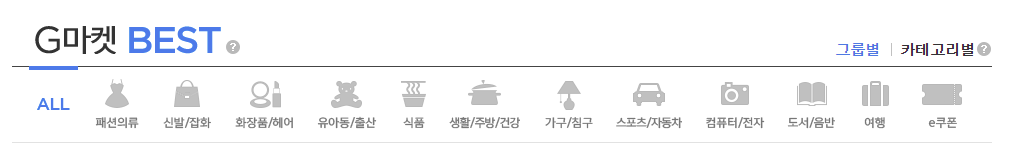

아래에 코드 입력

In [67]:
#1. 필요한 라이브러리 import 하기 (10점)
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [54]:
#2. 링크를 request.get으로 가져오기 (header가 필요한 경우 headers 입력) (10점)
res = requests.get('https://www.gmarket.co.kr/n/best?viewType=G&groupCode=G11/')
#3. BeautifulSoup을 이용해 파싱하기 (10점)
soup = BeautifulSoup(res.content, 'html.parser')
soup

<!DOCTYPE html>
<html class="no-js" lang="ko"><head><meta content="width=980" name="viewport"/><meta charset="utf-8"/><meta content="ie=edge" http-equiv="X-UA-Compatible"/><meta content="인터넷쇼핑,오픈마켓,패션/뷰티,디지털,식품/유아,스포츠/자동차,생활용품,도서/DVD,여행/항공권,e쿠폰/티켓,만화/게임,공동구매,경매,중고,글로벌쇼핑,브랜드샵,베스트셀러,방문쇼핑몰,G스탬프,할인쿠폰,동영상,이벤트 등 G마켓" name="description"/><meta content="베스트100,베스트셀러,경매,할인쿠폰,베스트셀러,공동구매,컴퓨터/핸드폰,에어컨/TV/디카,MP3/게임,패션/명품/브랜드,여성의류/속옷,남성의류/정장/빅사이즈,분유/기저귀/식품/생리대/임부복,유아동/장난감,쌀/과일/한우/생선,건강식품/음료,화장품/자동차,스포츠/다이어트,골프/등산/스키/낚시,운동화,네비게이션,리빙/침구/인테리어,애완/성인/공구,꽃배달,도서/여행/항공권,만화" name="keywords"/><meta content="https://www.gmarket.co.kr/n/best" name="msapplication-starturl"/><meta content="Gmarket" property="og:site_name"/><meta content="G마켓 베스트" property="og:title"/><meta content="website" property="og:type"/><meta content="https://www.gmarket.co.kr/n/best" property="og:url"/><meta content="http://pics.gmarket.co.kr/mobile/single/kr/common/sns/gmarket_sns.png" property="og:image"/><link href="https://www.gmarket.

In [61]:
#4. 상품명 크롤링하여 리스트로 저장하기 (20점)
item_list = soup.select('a.itemname')
title_list = []

for item in item_list:
    title_list.append(item.get_text())
title_list[0]

'(놀이대전) 캐리비안베이 골드1 골드2 종일권(이용기간 상이)'

In [63]:
#5. 정가 정보 크롤링하여 리스트로 저장하기 (10점)
item_list = soup.select('div.o-price')
o_price =[]
for item in item_list:
  o_price.append(item.get_text())
o_price[0]

'정가79,000원'

In [66]:
#6. 할인가 정보 크롤링하여 리스트로 저장하기 (10점)
item_list = soup.select('div.s-price')
s_price =[]
for item in item_list:
  s_price.append(item.get_text())
s_price[0]

'할인가44,900원 43%'

In [84]:
#7. 적절히 데이터 전처리를 하여 DataFrame 객체로 만들고 Excel 파일로 저장하기 (30점)
#이때, DataFrame의 열은 "상품명, 정가, 판매가"로 구성되어야 함.
gmarket_df = pd.DataFrame([title_list,o_price,s_price],index=["상품명", "정가", "판매가"]).T
gmarket_df

,상품명,정가,판매가
0,(놀이대전) 캐리비안베이 골드1 골드2 종일권(이용기간 상이),"정가79,000원","할인가44,900원 43%"
1,"|7%할인||강원 호텔| 레고랜드 코리아 리조트 (춘천,강촌)","정가227,700원","할인가216,320원 4%"
2,강원 용평리조트 Play Summer 패키지,,"할인가115,000원"
3,(놀이대전) 천안 오션어드벤처 미들/하이/골드시즌 1인 종일권 (주중.주말 공통),,"할인가31,900원"
4,(문자발송) 롯데워터파크 골드시즌 종일권(~8/27)/경남 워터파크/가족 여행,,"할인가36,100원"
...,...,...,...
95,"|7%할인||충남 호텔| 롯데리조트 부여 (서천,부여)","정가155,400원","할인가147,630원 5%"
96,(당일사용/문자발송) 과천 서울랜드 종일 파크 이용권 /놀이공원/테마파크/나들이/가...,"정가30,900원","할인가29,360원 4%"
97,괌리프호텔,"정가196,680원","할인가186,850원 4%"
98,|7%할인|쏠비치 진도 리조트 (전남 호텔/진도/목포/나주/완도/해남/영암),"정가174,000원","할인가161,820원 7%"


In [83]:
def extract_number(x):
    price = re.findall("\d.*원", x) 
    try:
      price_num = price[0].replace("원", "") 
      try:
        price_num = int(price_num.replace(",", "")) 
      except:
        price_num = int(price_num) 
    except:
      pass
    return price_num if price else None 

In [85]:
gmarket_df['정가'] = gmarket_df['정가'].apply(extract_number) 
gmarket_df['판매가'] = gmarket_df['판매가'].apply(extract_number) 

In [86]:
gmarket_df

,상품명,정가,판매가
0,(놀이대전) 캐리비안베이 골드1 골드2 종일권(이용기간 상이),79000.0,44900
1,"|7%할인||강원 호텔| 레고랜드 코리아 리조트 (춘천,강촌)",227700.0,216320
2,강원 용평리조트 Play Summer 패키지,NaN,115000
3,(놀이대전) 천안 오션어드벤처 미들/하이/골드시즌 1인 종일권 (주중.주말 공통),NaN,31900
4,(문자발송) 롯데워터파크 골드시즌 종일권(~8/27)/경남 워터파크/가족 여행,NaN,36100
...,...,...,...
95,"|7%할인||충남 호텔| 롯데리조트 부여 (서천,부여)",155400.0,147630
96,(당일사용/문자발송) 과천 서울랜드 종일 파크 이용권 /놀이공원/테마파크/나들이/가...,30900.0,29360
97,괌리프호텔,196680.0,186850
98,|7%할인|쏠비치 진도 리조트 (전남 호텔/진도/목포/나주/완도/해남/영암),174000.0,161820


In [87]:
def change(x):
    if pd.isnull(x['정가']):
        return x['판매가']
    else:
        return x['정가']
    

In [90]:
gmarket_df['정가'] = gmarket_df.apply(change,axis=1)

In [91]:
gmarket_df

,상품명,정가,판매가
0,(놀이대전) 캐리비안베이 골드1 골드2 종일권(이용기간 상이),79000.0,44900
1,"|7%할인||강원 호텔| 레고랜드 코리아 리조트 (춘천,강촌)",227700.0,216320
2,강원 용평리조트 Play Summer 패키지,115000.0,115000
3,(놀이대전) 천안 오션어드벤처 미들/하이/골드시즌 1인 종일권 (주중.주말 공통),31900.0,31900
4,(문자발송) 롯데워터파크 골드시즌 종일권(~8/27)/경남 워터파크/가족 여행,36100.0,36100
...,...,...,...
95,"|7%할인||충남 호텔| 롯데리조트 부여 (서천,부여)",155400.0,147630
96,(당일사용/문자발송) 과천 서울랜드 종일 파크 이용권 /놀이공원/테마파크/나들이/가...,30900.0,29360
97,괌리프호텔,196680.0,186850
98,|7%할인|쏠비치 진도 리조트 (전남 호텔/진도/목포/나주/완도/해남/영암),174000.0,161820


In [94]:
gmarket_df['정가'] = gmarket_df['정가'].apply(int)
gmarket_df

,상품명,정가,판매가
0,(놀이대전) 캐리비안베이 골드1 골드2 종일권(이용기간 상이),79000,44900
1,"|7%할인||강원 호텔| 레고랜드 코리아 리조트 (춘천,강촌)",227700,216320
2,강원 용평리조트 Play Summer 패키지,115000,115000
3,(놀이대전) 천안 오션어드벤처 미들/하이/골드시즌 1인 종일권 (주중.주말 공통),31900,31900
4,(문자발송) 롯데워터파크 골드시즌 종일권(~8/27)/경남 워터파크/가족 여행,36100,36100
...,...,...,...
95,"|7%할인||충남 호텔| 롯데리조트 부여 (서천,부여)",155400,147630
96,(당일사용/문자발송) 과천 서울랜드 종일 파크 이용권 /놀이공원/테마파크/나들이/가...,30900,29360
97,괌리프호텔,196680,186850
98,|7%할인|쏠비치 진도 리조트 (전남 호텔/진도/목포/나주/완도/해남/영암),174000,161820


In [97]:
gmarket_df.to_excel('gmarket_tour_data.xlsx')